In [26]:
import numpy as np
import classifier

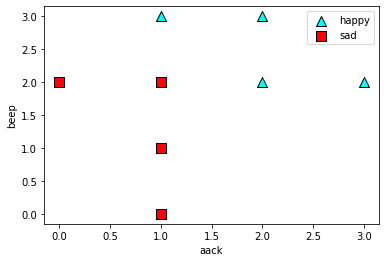

In [27]:
features = np.array([[1,0],[0,2],[1,1],[1,2],[1,3],[2,2],[2,3],[3,2]])
labels = np.array([0,0,0,0,1,1,1,1])
classifier.plot_points(features, labels)

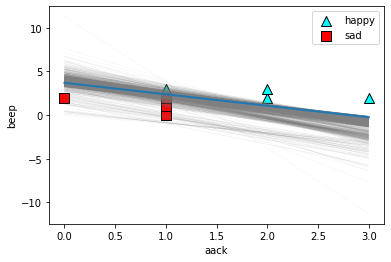

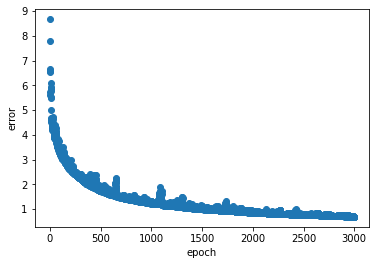

error = 0.6867351107285321


In [28]:
l = classifier.Logistic([1.0 for i in range(len(features[0]))], 0.0)
classifier.logistic_regression(l, features, labels, learning_rate=0.1, epochs=3000)

In [29]:
print(l.weights)
print(l.bias)

[3.23524801 2.46056906]
-9.09896103225798


## Real-life application


In [30]:
import turicreate as tc
tweets = tc.SFrame('twitter_training.csv')

Finished parsing file /workspaces/Python/chapter6/twitter_training.csv

Parsing completed. Parsed 100 lines in 0.13521 secs.

------------------------------------------------------
Inferred types from first 100 line(s) of file as 
column_type_hints=[int,str,str,str]
If parsing fails due to incorrect types, you can correct
the inferred type list above and pass it to read_csv in
the column_type_hints argument
------------------------------------------------------


Finished parsing file /workspaces/Python/chapter6/twitter_training.csv

Parsing completed. Parsed 74682 lines in 0.118217 secs.

In [31]:
tweets.column_names()
tweets = tweets.remove_column('id')
tweets = tweets.remove_column('entity')
tweets['words'] = tc.text_analytics.count_words(tweets['text'])
tweets = tweets.filter_by(['Positive', 'Negative'], 'sentiment')
tweets

sentiment,text,words
Positive,im getting on borderlandsand i will murder you ...,"{'i': 1.0, 'murder': 1.0,'will': 1.0, 'and': 1.0, ..."
Positive,I am coming to theborders and I will kill ...,"{'kill': 1.0, 'borders':1.0, 'you': 1.0, 'the': ..."
Positive,"im getting on borderlandsand i will kill you all, ...","{'kill': 1.0, 'i': 1.0,'will': 1.0, 'and': 1.0, ..."
Positive,im coming on borderlandsand i will murder you ...,"{'all': 1.0, 'i': 1.0,'murder': 1.0, 'will': ..."
Positive,im getting on borderlands2 and i will murder you ...,"{'you': 1.0, 'getting':1.0, 'on': 1.0, '2': ..."
Positive,im getting intoborderlands and i can ...,"{'can': 1.0, 'i': 1.0,'murder': 1.0, 'and': ..."
Positive,So I spent a few hoursmaking something for ...,"{'com': 1.0, 'pic': 1.0,'twitter': 1.0, 'enjoy': ..."
Positive,So I spent a couple ofhours doing something ...,"{'twitter': 1.0, 'com':1.0, 'pic': 1.0, 'have': ..."
Positive,So I spent a few hoursdoing something for ...,"{'favorite': 1.0, 'my':1.0, 'of': 1.0, ..."
Positive,So I spent a few hoursmaking something for ...,"{'com': 1.0, 'pic': 1.0,'twitter': 1.0, 'enjoy': ..."


In [32]:
model = tc.logistic_classifier.create(tweets, features=['words'], target='sentiment')
model

PROGRESS: Creating a validation set from 5 percent of training data. This may take a while.
          You can set ``validation_set=None`` to disable validation tracking.



Logistic regression:

--------------------------------------------------------

Number of examples          : 41205

Number of classes           : 2

Number of feature columns   : 1

Number of unpacked features : 19684

Number of coefficients      : 19685

Starting L-BFGS

--------------------------------------------------------

+-----------+----------+-----------+--------------+-------------------+---------------------+

| Iteration | Passes   | Step size | Elapsed Time | Training Accuracy | Validation Accuracy |

+-----------+----------+-----------+--------------+-------------------+---------------------+

| 0         | 2        | 1.000000  | 0.038684     | 0.856474          | 0.840018            |

| 1         | 4        | 1.000000  | 0.089510     | 0.911370          | 0.892577            |

| 2         | 6        | 1.000000  | 0.134665     | 0.929620          | 0.913785            |

| 3         | 8        | 1.000000  | 0.170167     | 0.945516          | 0.928077            |

| 4         | 9        | 1.000000  | 0.202144     | 0.954156          | 0.933610            |

| 9         | 22       | 1.221839  | 0.448806     | 0.964155          | 0.938220            |

+-----------+----------+-----------+--------------+-------------------+---------------------+

Class                          : LogisticClassifier

Schema
------
Number of coefficients         : 19685
Number of examples             : 41205
Number of classes              : 2
Number of feature columns      : 1
Number of unpacked features    : 19684

Hyperparameters
---------------
L1 penalty                     : 0.0
L2 penalty                     : 0.01

Training Summary
----------------
Solver                         : lbfgs
Solver iterations              : 10
Solver status                  : Completed (Iteration limit reached).
Training time (sec)            : 0.3074

Settings
--------
Log-likelihood                 : 3397.0406

Highest Positive Coefficients
-----------------------------
words[condescending]           : 13.2536
words[aroused]                 : 12.7683
words[wizards]                 : 12.7569
words[iwqio1zbh0]              : 11.904
words[bungie]                  : 11.6777

Lowest Negative Coefficients
----------------------------
words[trypphobia]              :

In [33]:
model.coefficients.print_rows(num_rows=50)

+-------------+-------------+----------+-----------------------+--------+
|     name    |    index    |  class   |         value         | stderr |
+-------------+-------------+----------+-----------------------+--------+
| (intercept) |     None    | Positive |  0.14386853578566175  |  None  |
|    words    |      i      | Positive |  0.19586622155425412  |  None  |
|    words    |    murder   | Positive |   1.5987764411016896  |  None  |
|    words    |     will    | Positive |   0.2110350741005752  |  None  |
|    words    |     and     | Positive |  0.05163675364932121  |  None  |
|    words    | borderlands | Positive |   0.7161963412178666  |  None  |
|    words    |      on     | Positive |  -0.2000159204019396  |  None  |
|    words    |     all     | Positive |   0.3463554425186489  |  None  |
|    words    |   getting   | Positive |  -0.2400234864479838  |  None  |
|    words    |     you     | Positive |  -0.19370559841504942 |  None  |
|    words    |      im     | Positive

In [51]:
tweets['prediction'] = model.predict(tweets, output_type='probability')

sentiment,text,words,prediction
Positive,im getting on borderlandsand i will murder you ...,"{'i': 1.0, 'murder': 1.0,'will': 1.0, 'and': 1.0, ...",0.9768442577235277
Positive,I am coming to theborders and I will kill ...,"{'kill': 1.0, 'borders':1.0, 'you': 1.0, 'the': ...",0.994970893911726
Positive,"im getting on borderlandsand i will kill you all, ...","{'kill': 1.0, 'i': 1.0,'will': 1.0, 'and': 1.0, ...",0.9380726612617525
Positive,im coming on borderlandsand i will murder you ...,"{'all': 1.0, 'i': 1.0,'murder': 1.0, 'will': ...",0.9946637704976946
Positive,im getting on borderlands2 and i will murder you ...,"{'you': 1.0, 'getting':1.0, 'on': 1.0, '2': ...",0.9831621488480744
Positive,im getting intoborderlands and i can ...,"{'can': 1.0, 'i': 1.0,'murder': 1.0, 'and': ...",0.9754385846951705
Positive,So I spent a few hoursmaking something for ...,"{'com': 1.0, 'pic': 1.0,'twitter': 1.0, 'enjoy': ...",0.9999999899678459
Positive,So I spent a couple ofhours doing something ...,"{'twitter': 1.0, 'com':1.0, 'pic': 1.0, 'have': ...",0.999999906305628
Positive,So I spent a few hoursdoing something for ...,"{'favorite': 1.0, 'my':1.0, 'of': 1.0, ...",0.9999202354122346
Positive,So I spent a few hoursmaking something for ...,"{'com': 1.0, 'pic': 1.0,'twitter': 1.0, 'enjoy': ...",0.9999999773631262


In [39]:
tweets.sort('prediction')[-1]

{'sentiment': 'Positive',
 'text': 'Congratulations on your retirement to Maureen! Over the past 20 years at The Home Depot you have influenced so many people! Thank you and wish you all the best! =] @ chipfull @ Leika1956 @ inDGlover @ SamConley8 @ GardnerD187 @ fly _ broyles @ DaveMusen @ THDonOV pic.fm / s1PG9BRsky',
 'words': {'pic': 1.0,
  'davemusen': 1.0,
  's1pg9brsky': 1.0,
  'gardnerd187': 1.0,
  'leika1956': 1.0,
  'fm': 1.0,
  'broyles': 1.0,
  'best': 1.0,
  '20': 1.0,
  'past': 1.0,
  'the': 3.0,
  'thdonov': 1.0,
  'samconley8': 1.0,
  'to': 1.0,
  'years': 1.0,
  'wish': 1.0,
  'thank': 1.0,
  'your': 1.0,
  'on': 1.0,
  'over': 1.0,
  'congratulations': 1.0,
  'chipfull': 1.0,
  'retirement': 1.0,
  'at': 1.0,
  'home': 1.0,
  'depot': 1.0,
  'you': 3.0,
  'indglover': 1.0,
  'people': 1.0,
  'many': 1.0,
  'all': 1.0,
  'maureen': 1.0,
  'have': 1.0,
  'influenced': 1.0,
  'fly': 1.0,
  'so': 1.0,
  'and': 1.0},
 'prediction': 1.0}

In [43]:
tweets.sort('prediction')[5]

{'sentiment': 'Negative',
 'text': 'Johnson & Johnson v Vaginal - Mesh Assault Lawsuit : Destruction Of Preliminary Evidence Regarding TVT When Sling May Be Immediately Brought Before Jury, Judge Says.. Feb 6, 2014.. U. N S. magistrate Judge Cheryl Eifert, W. Va. ruled J & N J Corporation ’ s forensic Ethicon unit acted negligently in destroying or losing thousands of documents & relevant files.',
 'words': {'relevant': 1.0,
  'documents': 1.0,
  'says': 1.0,
  'of': 2.0,
  'immediately': 1.0,
  'jury': 1.0,
  'in': 1.0,
  'before': 1.0,
  'w': 1.0,
  'lawsuit': 1.0,
  '6': 1.0,
  'ethicon': 1.0,
  'be': 1.0,
  'forensic': 1.0,
  'tvt': 1.0,
  'johnson': 2.0,
  'feb': 1.0,
  'sling': 1.0,
  'v': 1.0,
  'j': 2.0,
  'cheryl': 1.0,
  'vaginal': 1.0,
  'assault': 1.0,
  'destruction': 1.0,
  'evidence': 1.0,
  'regarding': 1.0,
  'mesh': 1.0,
  '2014': 1.0,
  'n': 2.0,
  'unit': 1.0,
  'magistrate': 1.0,
  'files': 1.0,
  'preliminary': 1.0,
  'eifert': 1.0,
  's': 2.0,
  'losing': 1.0,
  

In [67]:
t = {
    "text": ['Good']
}
test_data = tc.SFrame(t)
test_data["words"] = tc.text_analytics.count_words(test_data["text"])
print(test_data)

model.predict(test_data, output_type='probability')


+------+---------------+
| text |     words     |
+------+---------------+
| Good | {'good': 1.0} |
+------+---------------+
[1 rows x 2 columns]



dtype: float
Rows: 1
[0.8676932296098856]